This Notebook will be used for the Capstone Project.

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt

import json # library to handle JSON files
from pandas.io.json import json_normalize

!pip install geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
from geopy import distance

!pip install pgeocode
import pgeocode

from datetime import datetime

import http.client, urllib.parse

import requests # library to handle requests

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

from sklearn import preprocessing

!pip install folium
import folium # map rendering library

print('Libraries imported.')

     |████████████████████████████████| 122kB 4.8MB/s eta 0:00:01
Libraries imported.


## Zip Codes were extracted from https://en.wikipedia.org/wiki/List_of_ZIP_codes_in_the_Philippines. 

In [2]:
metromanila_data = pd.read_csv("MetroManilaZipCodes.csv")
metromanila_data.rename(columns={"Area": "Neighborhood"},inplace=True)

In [3]:
metromanila_data.head()

,City,Neighborhood,ZipCode
0,Manila,Manila CPO - Ermita,1000
1,Manila,Quiapo,1001
2,Manila,Intramuros,1002
3,Manila,Sta Cruz South,1003
4,Manila,Malate,1004


## Filter only Makati Neighborhoods

In [4]:
makati_data = metromanila_data[metromanila_data['City'].isin(['Makati City'])]
makati_data.head()

,City,Neighborhood,ZipCode
57,Makati City,"Makati CPO (Inc, Buendia Up To",1200
58,Makati City,Fort Bonifacio Naval Stn.,1202
59,Makati City,San Antonio Village (Inc. Malu),1203
60,Makati City,La Paz-Singkamas-Tejeros,1204
61,Makati City,Sta. Cruz,1205


## Group by City and ZipCode.  Combine Neighborhood if not unique.

In [5]:
makati_data = makati_data.groupby(['City','ZipCode'])['Neighborhood'].apply(', '.join).reset_index()
makati_data

,City,ZipCode,Neighborhood
0,Makati City,1200,"Makati CPO (Inc, Buendia Up To"
1,Makati City,1202,Fort Bonifacio Naval Stn.
2,Makati City,1203,San Antonio Village (Inc. Malu)
3,Makati City,1204,La Paz-Singkamas-Tejeros
4,Makati City,1205,Sta. Cruz
5,Makati City,1206,Kasilawan
6,Makati City,1207,Olympia And Carmona
7,Makati City,1208,"Valenzuela (Inc. Santiago, San Miguel & Rizal ..."
8,Makati City,1209,Bel-air
9,Makati City,1210,Poblacion


## Lookup the geo coordinates of these Zip Codes using pgeocode.

In [6]:
nomi = pgeocode.Nominatim('ph')
geolocator = Nominatim(user_agent="metromanila_explorer")
for index, row in makati_data.iterrows():
    location = nomi.query_postal_code(row['ZipCode'])
    makati_data.loc[index,'Latitude'] = location.latitude
    makati_data.loc[index,'Longitude'] = location.longitude
makati_data.sort_values(by=['Latitude'])

,City,ZipCode,Neighborhood,Latitude,Longitude
32,Makati City,1233,Bangkal,9.9833,123.2000
29,Makati City,1230,Pio Del Pilar,12.5333,125.1167
30,Makati City,1231,"Pasong Tamo 2000 Up, Ecology V",13.8317,122.5026
19,Makati City,1220,Forbes Park South,14.2530,121.6374
22,Makati City,1223,San Lorenzo Village,14.2530,121.6374
23,Makati City,1224,Commercial Center,14.2530,121.6374
24,Makati City,1225,Urdaneta Village,14.2530,121.6374
25,Makati City,1226,Ayala-Paseo De Roxas,14.2530,121.6374
26,Makati City,1227,Salcedo Village,14.2530,121.6374
27,Makati City,1228,Greenbelt,14.2530,121.6374


In [7]:
# create map
address = 'Makati City, PH'
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
makati = folium.Map(location=[latitude, longitude], zoom_start=6)

for lat, lon, poi, in zip(makati_data['Latitude'], makati_data['Longitude'], makati_data['Neighborhood']):
    label = folium.Popup(str(poi), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        fill=True,
        fill_opacity=0.7).add_to(makati)
    
makati.save('makati_initial.html')
makati

## I found problems above.  Some are definitely not in Makati (where most of the dots are) while some did not get correct coordinates. 

## Because the coordinates were not useable, I had to look for the right coordinates using Google Maps.  Below are the corrections I made.  I also removed some neighborhoods that were redundant.

In [8]:
makati_data.loc[0,'Latitude'] = 14.561608
makati_data.loc[0,'Longitude'] = 121.014653
makati_data.loc[10,'Latitude'] = 14.564093
makati_data.loc[10,'Longitude'] = 121.040647
makati_data.loc[11,'Latitude'] = 14.561316
makati_data.loc[11,'Longitude'] = 121.046323
makati_data.loc[12,'Latitude'] = 14.557453
makati_data.loc[12,'Longitude'] = 121.062238
makati_data.loc[13,'Latitude'] = 14.564109
makati_data.loc[13,'Longitude'] = 121.050312
makati_data.loc[14,'Latitude'] = 14.560376
makati_data.loc[14,'Longitude'] = 121.061740
makati_data.loc[15,'Latitude'] = 14.553860
makati_data.loc[15,'Longitude'] = 121.040135
makati_data.loc[16,'Latitude'] = 14.546872
makati_data.loc[16,'Longitude'] = 121.064339
makati_data.loc[17,'Latitude'] = 14.544181
makati_data.loc[17,'Longitude'] = 121.057927
makati_data.loc[18,'Latitude'] = 14.551788
makati_data.loc[18,'Longitude'] = 121.035299
makati_data.loc[19,'Latitude'] = 14.546520
makati_data.loc[19,'Longitude'] = 121.037399
makati_data.loc[2,'Latitude'] = 14.563281
makati_data.loc[2,'Longitude'] = 121.012607
makati_data.loc[21,'Latitude'] = 14.540898
makati_data.loc[21,'Longitude'] = 121.024115
makati_data.loc[22,'Latitude'] = 14.550459
makati_data.loc[22,'Longitude'] = 121.022843
makati_data.loc[23,'Latitude'] = 14.573050
makati_data.loc[23,'Longitude'] = 121.016195
makati_data.loc[24,'Latitude'] = 14.555773
makati_data.loc[24,'Longitude'] = 121.029341
makati_data.loc[25,'Latitude'] = 14.557211
makati_data.loc[25,'Longitude'] = 121.021379
makati_data.loc[26,'Latitude'] = 14.559922
makati_data.loc[26,'Longitude'] = 121.021399
makati_data.loc[27,'Latitude'] = 14.555349
makati_data.loc[27,'Longitude'] = 121.021121
makati_data.loc[28,'Latitude'] = 14.554394 
makati_data.loc[28,'Longitude'] = 121.017086
makati_data.loc[29,'Latitude'] = 14.553145
makati_data.loc[29,'Longitude'] = 121.011199
makati_data.loc[3,'Latitude'] = 14.568549
makati_data.loc[3,'Longitude'] = 121.008594
makati_data.loc[30,'Latitude'] = 14.544497
makati_data.loc[30,'Longitude'] = 121.018211
makati_data.loc[31,'Latitude'] = 14.534434
makati_data.loc[31,'Longitude'] = 121.017674
makati_data.loc[32,'Latitude'] = 14.543821
makati_data.loc[32,'Longitude'] = 121.011560
makati_data.loc[33,'Latitude'] = 14.553957
makati_data.loc[33,'Longitude'] = 121.006202
makati_data.loc[34,'Latitude'] = 14.559521
makati_data.loc[34,'Longitude'] = 121.003213
makati_data.loc[4,'Latitude'] = 14.567455
makati_data.loc[4,'Longitude'] = 121.015539
makati_data.loc[5,'Latitude'] = 14.576348
makati_data.loc[5,'Longitude'] = 121.014462
makati_data.loc[6,'Latitude'] = 14.570962
makati_data.loc[6,'Longitude'] = 121.020595
makati_data.loc[9,'Latitude'] = 14.565775
makati_data.loc[9,'Longitude'] = 121.032212

makati_data = makati_data.drop([1,7,8,20], axis=0)

In [9]:
makati_corrected = folium.Map(location=[latitude, longitude], zoom_start=6)

for lat, lon, poi, in zip(makati_data['Latitude'], makati_data['Longitude'], makati_data['Neighborhood']):
    label = folium.Popup(str(poi), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        fill=True,
        fill_opacity=0.7).add_to(makati_corrected)
makati_corrected.save('makati_corrected.html')  
makati_corrected

### I needed to convert ZipCodes to str for later processing.

In [10]:
makati_data['ZipCode'] = makati_data['ZipCode'].apply(str)

In [11]:
makati_data.reset_index(drop=True)

,City,ZipCode,Neighborhood,Latitude,Longitude
0,Makati City,1200,"Makati CPO (Inc, Buendia Up To",14.561608,121.014653
1,Makati City,1203,San Antonio Village (Inc. Malu),14.563281,121.012607
2,Makati City,1204,La Paz-Singkamas-Tejeros,14.568549,121.008594
3,Makati City,1205,Sta. Cruz,14.567455,121.015539
4,Makati City,1206,Kasilawan,14.576348,121.014462
5,Makati City,1207,Olympia And Carmona,14.570962,121.020595
6,Makati City,1210,Poblacion,14.565775,121.032212
7,Makati City,1211,Guadalupe Viejo (Inc. Palm Vil),14.564093,121.040647
8,Makati City,1212,Guadalupe Nuevo (Inc. Visayan),14.561316,121.046323
9,Makati City,1213,Pinagkaisahan-pitogo,14.557453,121.062238


## Foursquare Credentials and Parameters

In [12]:
CLIENT_ID = 'LOSFZ4FBX2A2ZCRREUJKDCQ0QF4YPUZX2D3FPNSS4ZU2CJ55' # your Foursquare ID
CLIENT_SECRET = 'S55I1ESN33JOIGDOHDGPYU4I4OLMLEXPBQ0OYJ3NA2KHDBWZ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

RADIUS = 500
LIMIT = 100

address = 'Makati City, PH'

location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Makati are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Makati are 14.5568853, 121.023532.


In [13]:
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, RADIUS, LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?client_id=LOSFZ4FBX2A2ZCRREUJKDCQ0QF4YPUZX2D3FPNSS4ZU2CJ55&client_secret=S55I1ESN33JOIGDOHDGPYU4I4OLMLEXPBQ0OYJ3NA2KHDBWZ&ll=14.5568853,121.023532&v=20180605&radius=500&limit=100'

In [14]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ec6a4170be7b4001b6166ea'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Bel-Air',
  'headerFullLocation': 'Bel-Air, Makati City',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 73,
  'suggestedBounds': {'ne': {'lat': 14.561385304500003,
    'lng': 121.02817257142276},
   'sw': {'lat': 14.552385295499995, 'lng': 121.01889142857725}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b7433e9f964a520d0cc2de3',
       'name': 'Ayala Triangle Gardens',
       'location': {'address': 'Paseo de Roxas',
        'crossStreet': 'at Ayala Ave & Makati Ave',
        'lat': 14.55647077535555,
        'lng': 121.02320414567647,
        'd

In [15]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [16]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = pd.json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Ayala Triangle Gardens,Park,14.556471,121.023204
1,Banapple Pies & Cheesecakes,Restaurant,14.556634,121.023619
2,The Peninsula Manila,Hotel,14.555066,121.025466
3,Escolta,Filipino Restaurant,14.555485,121.025509
4,Little Flour Café,Café,14.557978,121.021919


In [17]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, RADIUS, LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [18]:
makati_venues = getNearbyVenues(names=makati_data['Neighborhood'],
                                   latitudes=makati_data['Latitude'],
                                   longitudes=makati_data['Longitude']
                                  )

Makati CPO (Inc, Buendia Up To
San Antonio Village (Inc. Malu)
La Paz-Singkamas-Tejeros
Sta. Cruz
Kasilawan
Olympia And Carmona
Poblacion
Guadalupe Viejo (Inc. Palm Vil)
Guadalupe Nuevo (Inc. Visayan)
Pinagkaisahan-pitogo
Cembo
Rembo(west)
Rembo (East) & Malapad Na Bato
Comembo
Pembo
Forbes Park North
Forbes Park South
Dasmarinas Village South
San Lorenzo Village
Commercial Center
Urdaneta Village
Ayala-Paseo De Roxas
Salcedo Village
Greenbelt
Legaspi Village
Pio Del Pilar
Pasong Tamo 2000 Up, Ecology V
Magallanes Village
Bangkal
San Isidro
Palanan


In [19]:
makati_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Ayala-Paseo De Roxas,100,100,100,100,100,100
Bangkal,22,22,22,22,22,22
Cembo,7,7,7,7,7,7
Comembo,24,24,24,24,24,24
Commercial Center,40,40,40,40,40,40
Dasmarinas Village South,13,13,13,13,13,13
Forbes Park North,13,13,13,13,13,13
Forbes Park South,26,26,26,26,26,26
Greenbelt,100,100,100,100,100,100


In [20]:
# one hot encoding
makati_onehot = pd.get_dummies(makati_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
makati_onehot['Neighborhood'] = makati_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [makati_onehot.columns[-1]] + list(makati_onehot.columns[:-1])
makati_onehot = makati_onehot[fixed_columns]

makati_onehot.head()

,Neighborhood,American Restaurant,Antique Shop,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Badminton Court,Bakery,Bar,Baseball Field,Basketball Court,Beer Bar,Beer Garden,Bike Rental / Bike Share,Bike Shop,Bistro,Bookstore,Boutique,Bowling Alley,Boxing Gym,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Stop,Café,Camera Store,Candy Store,Cantonese Restaurant,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Dog Run,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish Market,Food,Food & Drink Shop,Food Court,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Gastropub,German Restaurant,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Hardware Store,Health & Beauty Service,Health Food Store,History Museum,Hostel,Hotel,Hotel Bar,Hunan Restaurant,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Korean Restaurant,Latin American Restaurant,Lounge,Market,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Mongolian Restaurant,Motel,Movie Theater,Moving Target,Multiplex,Music Store,Music Venue,New American Restaurant,Nursery School,Office,Okonomiyaki Restaurant,Organic Grocery,Paella Restaurant,Park,Pastry Shop,Perfume Shop,Pet Service,Pet Store,Pharmacy,Pizza Place,Plaza,Portuguese Restaurant,Pub,Public Art,Ramen Restaurant,Recreation Center,Residential Building (Apartment / Condo),Resort,Restaurant,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shabu-Shabu Restaurant,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Snack Place,Soba Restaurant,Soccer Field,Social Club,Soup Place,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Steakhouse,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tailor Shop,Tapas Restaurant,Tea Room,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Restaurant,Tonkatsu Restaurant,Udon Restaurant,Vape Store,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,"Makati CPO (Inc, Buendia Up To",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"Makati CPO (Inc, Buendia Up To",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"Makati CPO (Inc, Buendia Up To",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"Makati CPO (Inc, Buendia Up To",0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [21]:
makati_grouped = makati_onehot.groupby('Neighborhood').mean().reset_index()
makati_grouped

,Neighborhood,American Restaurant,Antique Shop,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Badminton Court,Bakery,Bar,Baseball Field,Basketball Court,Beer Bar,Beer Garden,Bike Rental / Bike Share,Bike Shop,Bistro,Bookstore,Boutique,Bowling Alley,Boxing Gym,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Stop,Café,Camera Store,Candy Store,Cantonese Restaurant,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Dog Run,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish Market,Food,Food & Drink Shop,Food Court,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Gastropub,German Restaurant,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Hardware Store,Health & Beauty Service,Health Food Store,History Museum,Hostel,Hotel,Hotel Bar,Hunan Restaurant,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Korean Restaurant,Latin American Restaurant,Lounge,Market,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Mongolian Restaurant,Motel,Movie Theater,Moving Target,Multiplex,Music Store,Music Venue,New American Restaurant,Nursery School,Office,Okonomiyaki Restaurant,Organic Grocery,Paella Restaurant,Park,Pastry Shop,Perfume Shop,Pet Service,Pet Store,Pharmacy,Pizza Place,Plaza,Portuguese Restaurant,Pub,Public Art,Ramen Restaurant,Recreation Center,Residential Building (Apartment / Condo),Resort,Restaurant,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shabu-Shabu Restaurant,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Snack Place,Soba Restaurant,Soccer Field,Social Club,Soup Place,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Steakhouse,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tailor Shop,Tapas Restaurant,Tea Room,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Restaurant,Tonkatsu Restaurant,Udon Restaurant,Vape Store,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Ayala-Paseo De Roxas,0.000000,0.000000,0.000000,0.00000,0.010000,0.010000,0.020000,0.00,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.020000,0.000000,0.01,0.000000,0.00,0.010000,0.010000,0.000000,0.000000,0.00000,0.000000,0.000000,0.060000,0.000000,0.000000,0.000000,0.000000,0.01,0.040000,0.010000,0.110000,0.010000,0.000000,0.020000,0.000000,0.010000,0.01,0.000000,0.000000,0.010000,0.000000,0.010000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.00,0.010000,0.000000,0.000000,0.050000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.01000,0.000000,0.00000,0.000000,0.000000,0.00,0.000000,0.000000,0.020000,0.000000,0.000000,0.01,0.000000,0.01,0.000000,0.010000,0.00,0.000000,0.020000,0.000000,0.00,0.00,0.040000,0.000000,0.000000,0.010000,0.000000,0.000000,0.00,0.020000,0.000000,0.01,0.000000,0.01,0.030000,0.010000,0.000000,0.00,0.010000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.00,0.020000,0.00000,0.01,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.010000,0.000000,0.00,0.010000,0.000000,0.060000,0.00,0.020000,0.010000,0.020000,0.00000,0.00000,0.000000,0.000000,0.010000,0.00000,0.010000,0.000000,0.000000,0.00,0.000000,0.030000,0.01000

In [22]:
num_top_venues = 5

for hood in makati_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = makati_grouped[makati_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Ayala-Paseo De Roxas----
                 venue  freq
0          Coffee Shop  0.11
1                 Café  0.06
2           Restaurant  0.06
3  Filipino Restaurant  0.05
4          Yoga Studio  0.04


----Bangkal----
               venue  freq
0  Convenience Store  0.18
1         Restaurant  0.05
2   Tapas Restaurant  0.05
3       Antique Shop  0.05
4                Gym  0.05


----Cembo----
                  venue  freq
0     Convenience Store  0.43
1                  Park  0.29
2              Pharmacy  0.14
3  Fast Food Restaurant  0.14
4   American Restaurant  0.00


----Comembo----
                  venue  freq
0  Fast Food Restaurant  0.17
1      Ramen Restaurant  0.12
2     Convenience Store  0.12
3                 Diner  0.08
4             BBQ Joint  0.08


----Commercial Center----
                  venue  freq
0           Coffee Shop  0.10
1  Fast Food Restaurant  0.08
2  Gym / Fitness Center  0.05
3            Donut Shop  0.05
4   American Restaurant  0.02


----Dasmarina

In [23]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

## Identify the top 10 venue types in each Neighborhood

In [24]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = makati_grouped['Neighborhood']

for ind in np.arange(makati_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(makati_grouped.iloc[ind, :], num_top_venues)
    
neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ayala-Paseo De Roxas,Coffee Shop,Restaurant,Café,Filipino Restaurant,Yoga Studio,Italian Restaurant,Clothing Store,Spa,Mediterranean Restaurant,Park
1,Bangkal,Convenience Store,Bar,Pharmacy,Diner,Resort,Restaurant,Chinese Restaurant,Fast Food Restaurant,Burger Joint,French Restaurant
2,Cembo,Convenience Store,Park,Pharmacy,Fast Food Restaurant,Yoga Studio,Drugstore,Filipino Restaurant,Field,Farmers Market,Falafel Restaurant
3,Comembo,Fast Food Restaurant,Ramen Restaurant,Convenience Store,Diner,BBQ Joint,Spa,Bakery,Pharmacy,Chinese Restaurant,Fish Market
4,Commercial Center,Coffee Shop,Fast Food Restaurant,Gym / Fitness Center,Donut Shop,Shopping Mall,Burger Joint,Shabu-Shabu Restaurant,Seafood Restaurant,Burrito Place,Café
5,Dasmarinas Village South,Basketball Court,Hotel,Gym,Bus Line,Camera Store,Bike Rental / Bike Share,Coffee Shop,Theater,Baseball Field,Soccer Field
6,Forbes Park North,Women's Store,Golf Course,Dessert Shop,Convenience Store,Coffee Shop,Drugstore,Café,Fast Food Restaurant,Snack Place,Bookstore
7,Forbes Park South,Coffee Shop,Café,Italian Restaurant,Lounge,Japanese Restaurant,American Restaurant,Golf Course,Dessert Shop,Plaza,Field
8,Greenbelt,Café,Filipino Restaurant,Italian Restaurant,Boutique,Restaurant,Clothing Store,Cosmetics Shop,Shopping Mall,Spa,Bakery
9,Guadalupe Nuevo (Inc. Visayan),Convenience Store,Fast Food Restaurant,Breakfast Spot,Bakery,Dim Sum Restaurant,Farmers Market,Music Store,Motel,Burger Joint,Basketball Court


## Use K-Means Clustering to group Neighborhoods based on Top Venue Types.  Compare k from 1 to 9 and use the Elbow Method to get the Optimal k. 

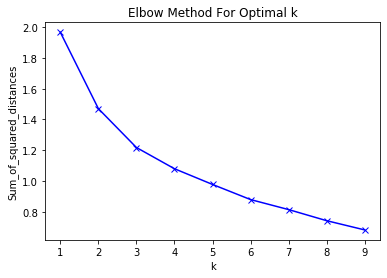

In [25]:
makati_grouped_clustering = makati_grouped.drop('Neighborhood', 1)
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k,random_state=0)
    km = km.fit(makati_grouped_clustering)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

## K = 3 gives the optimal clustering

In [26]:
kclusters = 3
kmeans = KMeans(n_clusters=kclusters,random_state=0)
kmeans = kmeans.fit(makati_grouped_clustering)

In [27]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

makati_merged = makati_data

# merge makati_grouped with makati_data to add latitude/longitude for each neighborhood
makati_merged = makati_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

### Cluster 1

In [28]:
makati_merged.loc[makati_merged['Cluster Labels'] == 0, makati_merged.columns[[2] + list(range(5, makati_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Kasilawan,0,Convenience Store,Dim Sum Restaurant,Athletics & Sports,Fast Food Restaurant,BBQ Joint,Supermarket,Shop & Service,Bus Stop,Yoga Studio,Electronics Store
11,Guadalupe Nuevo (Inc. Visayan),0,Convenience Store,Fast Food Restaurant,Breakfast Spot,Bakery,Dim Sum Restaurant,Farmers Market,Music Store,Motel,Burger Joint,Basketball Court
13,Cembo,0,Convenience Store,Park,Pharmacy,Fast Food Restaurant,Yoga Studio,Drugstore,Filipino Restaurant,Field,Farmers Market,Falafel Restaurant
14,Rembo(west),0,Fast Food Restaurant,Convenience Store,Moving Target,Snack Place,Yoga Studio,Dumpling Restaurant,Filipino Restaurant,Field,Farmers Market,Falafel Restaurant


### Cluster 2

In [29]:
makati_merged.loc[makati_merged['Cluster Labels'] == 1, makati_merged.columns[[2] + list(range(5, makati_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Makati CPO (Inc, Buendia Up To",1,Bar,Pizza Place,Beer Garden,Hotel,Grocery Store,Coffee Shop,Karaoke Bar,Yoga Studio,Sporting Goods Shop,Food Court
2,San Antonio Village (Inc. Malu),1,Coffee Shop,Convenience Store,BBQ Joint,Donut Shop,Filipino Restaurant,Pizza Place,Bar,Sandwich Place,Restaurant,Asian Restaurant
3,La Paz-Singkamas-Tejeros,1,Filipino Restaurant,Restaurant,Convenience Store,Pet Store,Italian Restaurant,Burger Joint,Bubble Tea Shop,Fried Chicken Joint,Korean Restaurant,Gas Station
4,Sta. Cruz,1,Beer Garden,Hotel,Dessert Shop,Karaoke Bar,Gym,Sandwich Place,Japanese Restaurant,Spanish Restaurant,Spa,Soup Place
6,Olympia And Carmona,1,Convenience Store,Filipino Restaurant,Fast Food Restaurant,Coffee Shop,Gym / Fitness Center,Café,American Restaurant,Clothing Store,Chinese Restaurant,Restaurant
9,Poblacion,1,Café,Coffee Shop,Korean Restaurant,Hostel,Dessert Shop,Bakery,Ramen Restaurant,Bubble Tea Shop,Hotel,Women's Store
10,Guadalupe Viejo (Inc. Palm Vil),1,Restaurant,Coffee Shop,Dessert Shop,Fast Food Restaurant,Italian Restaurant,Deli / Bodega,Juice Bar,Multiplex,Food Court,Boutique
15,Rembo (East) & Malapad Na Bato,1,Café,Coffee Shop,Japanese Restaurant,Breakfast Spot,Comfort Food Restaurant,Seafood Restaurant,Mediterranean Restaurant,Bubble Tea Shop,Brewery,Spa
16,Comembo,1,Fast Food Restaurant,Ramen Restaurant,Convenience Store,Diner,BBQ Joint,Spa,Bakery,Pharmacy,Chinese Restaurant,Fish Market
17,Pembo,1,Coffee Shop,Convenience Store,Movie Theater,Clothing Store,Dessert Shop,Filipino Restaurant,Karaoke Bar,Korean Restaurant,Lounge,Buffet


### Cluster 3

In [30]:
makati_merged.loc[makati_merged['Cluster Labels'] == 2, makati_merged.columns[[2] + list(range(5, makati_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,Pinagkaisahan-pitogo,2,Food,Soccer Field,Intersection,Basketball Court,Eastern European Restaurant,Fish Market,Filipino Restaurant,Field,Fast Food Restaurant,Farmers Market


## Display the neighborhood clusters on a map of Makati.

In [31]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=14)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
rainbow =['red','blue','green']
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(makati_merged['Latitude'], makati_merged['Longitude'], makati_merged['Neighborhood'], makati_merged['Cluster Labels']):
    label = folium.Popup(str(poi), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster],
        fill=True,
        fill_color=rainbow[cluster],
        fill_opacity=0.7).add_to(map_clusters)
map_clusters.save('makati_clusters.html')       
map_clusters

## The 10 Makati Subway stations were found here. (https://businessmirror.com.ph/2019/10/30/makati-subway-project-gets-additional-332-million-initial-funding/)

In [32]:
makati_stations = pd.read_csv("Makati_Subway_Stations.csv")
makati_stations

,Station,Latitude,Longitude
0,EDSA-Ayala,14.55093,121.02883
1,Ayala Triangle,14.55671,121.02281
2,Makati Central Park,14.56215,121.01494
3,Police Headquarters,14.56356,121.01524
4,Circuit City,14.57305,121.01946
5,Makati City Hall,14.57081,121.02728
6,Rockwell,14.56324,121.03580
7,Guadalupe,14.56741,121.04542
8,University of Makati,14.56397,121.05575
9,Ospital ng Makati,14.54681,121.06176


## The previous dataframe is copied for further analysis.  Subway station proximity will be added later as another factor. 

In [33]:
makati_merged_new = makati_merged
makati_merged_new.set_index('Neighborhood')

,City,ZipCode,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
Neighborhood,,,,,,,,,,,,,,,
"Makati CPO (Inc, Buendia Up To",Makati City,1200,14.561608,121.014653,1,Bar,Pizza Place,Beer Garden,Hotel,Grocery Store,Coffee Shop,Karaoke Bar,Yoga Studio,Sporting Goods Shop,Food Court
San Antonio Village (Inc. Malu),Makati City,1203,14.563281,121.012607,1,Coffee Shop,Convenience Store,BBQ Joint,Donut Shop,Filipino Restaurant,Pizza Place,Bar,Sandwich Place,Restaurant,Asian Restaurant
La Paz-Singkamas-Tejeros,Makati City,1204,14.568549,121.008594,1,Filipino Restaurant,Restaurant,Convenience Store,Pet Store,Italian Restaurant,Burger Joint,Bubble Tea Shop,Fried Chicken Joint,Korean Restaurant,Gas Station
Sta. Cruz,Makati City,1205,14.567455,121.015539,1,Beer Garden,Hotel,Dessert Shop,Karaoke Bar,Gym,Sandwich Place,Japanese Restaurant,Spanish Restaurant,Spa,Soup Place
Kasilawan,Makati City,1206,14.576348,121.014462,0,Convenience Store,Dim Sum Restaurant,Athletics & Sports,Fast Food Restaurant,BBQ Joint,Supermarket,Shop & Service,Bus Stop,Yoga Studio,Electronics Store
Olympia And Carmona,Makati City,1207,14.570962,121.020595,1,Convenience Store,Filipino Restaurant,Fast Food Restaurant,Coffee Shop,Gym / Fitness Center,Café,American Restaurant,Clothing Store,Chinese Restaurant,Restaurant
Poblacion,Makati City,1210,14.565775,121.032212,1,Café,Coffee Shop,Korean Restaurant,Hostel,Dessert Shop,Bakery,Ramen Restaurant,Bubble Tea Shop,Hotel,Women's Store
Guadalupe Viejo (Inc. Palm Vil),Makati City,1211,14.564093,121.040647,1,Restaurant,Coffee Shop,Dessert Shop,Fast Food Restaurant,Italian Restaurant,Deli / Bodega,Juice Bar,Multiplex,Food Court,Boutique
Guadalupe Nuevo (Inc. Visayan),Makati City,1212,14.561316,121.046323,0,Convenience Store,Fast Food Restaurant,Breakfast Spot,Bakery,Dim Sum Restaurant,Farmers Market,Music Store,Motel,Burger Joint,Basketball Court


## Shortest distance from each neighborhood to any of the stations is computed and stored in Distance_To_Station. Columns are rearranged for convenience.

In [34]:
for i, row in makati_merged_new.iterrows():
    origin = (makati_merged_new.loc[i,'Latitude'],makati_merged_new.loc[i,'Longitude'])
    min_dist = 99999
    for j, row in makati_stations.iterrows():
        destination = (makati_stations.loc[j,'Latitude'],makati_stations.loc[j,'Longitude'])
        dist = distance.distance(origin,destination).meters
        if dist < min_dist:
            min_dist = dist
    makati_merged_new.loc[i,'Distance_To_Station'] = min_dist
cols = makati_merged_new.columns.tolist()
cols = cols[-1:] + cols[:-1]
makati_merged_new = makati_merged_new[cols]
makati_merged_new.set_index('Neighborhood')

,Distance_To_Station,City,ZipCode,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
Neighborhood,,,,,,,,,,,,,,,,
"Makati CPO (Inc, Buendia Up To",67.475320,Makati City,1200,14.561608,121.014653,1,Bar,Pizza Place,Beer Garden,Hotel,Grocery Store,Coffee Shop,Karaoke Bar,Yoga Studio,Sporting Goods Shop,Food Court
San Antonio Village (Inc. Malu),280.839332,Makati City,1203,14.563281,121.012607,1,Coffee Shop,Convenience Store,BBQ Joint,Donut Shop,Filipino Restaurant,Pizza Place,Bar,Sandwich Place,Restaurant,Asian Restaurant
La Paz-Singkamas-Tejeros,904.242772,Makati City,1204,14.568549,121.008594,1,Filipino Restaurant,Restaurant,Convenience Store,Pet Store,Italian Restaurant,Burger Joint,Bubble Tea Shop,Fried Chicken Joint,Korean Restaurant,Gas Station
Sta. Cruz,432.163349,Makati City,1205,14.567455,121.015539,1,Beer Garden,Hotel,Dessert Shop,Karaoke Bar,Gym,Sandwich Place,Japanese Restaurant,Spanish Restaurant,Spa,Soup Place
Kasilawan,650.561473,Makati City,1206,14.576348,121.014462,0,Convenience Store,Dim Sum Restaurant,Athletics & Sports,Fast Food Restaurant,BBQ Joint,Supermarket,Shop & Service,Bus Stop,Yoga Studio,Electronics Store
Olympia And Carmona,261.404898,Makati City,1207,14.570962,121.020595,1,Convenience Store,Filipino Restaurant,Fast Food Restaurant,Coffee Shop,Gym / Fitness Center,Café,American Restaurant,Clothing Store,Chinese Restaurant,Restaurant
Poblacion,477.679787,Makati City,1210,14.565775,121.032212,1,Café,Coffee Shop,Korean Restaurant,Hostel,Dessert Shop,Bakery,Ramen Restaurant,Bubble Tea Shop,Hotel,Women's Store
Guadalupe Viejo (Inc. Palm Vil),530.797363,Makati City,1211,14.564093,121.040647,1,Restaurant,Coffee Shop,Dessert Shop,Fast Food Restaurant,Italian Restaurant,Deli / Bodega,Juice Bar,Multiplex,Food Court,Boutique
Guadalupe Nuevo (Inc. Visayan),681.253696,Makati City,1212,14.561316,121.046323,0,Convenience Store,Fast Food Restaurant,Breakfast Spot,Bakery,Dim Sum Restaurant,Farmers Market,Music Store,Motel,Burger Joint,Basketball Court


## The previous dataframe is copied for clustering with the additional factor.

In [35]:
makati_grouped_new = makati_grouped
makati_grouped_new.set_index('Neighborhood')

,American Restaurant,Antique Shop,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Badminton Court,Bakery,Bar,Baseball Field,Basketball Court,Beer Bar,Beer Garden,Bike Rental / Bike Share,Bike Shop,Bistro,Bookstore,Boutique,Bowling Alley,Boxing Gym,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Stop,Café,Camera Store,Candy Store,Cantonese Restaurant,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Dog Run,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish Market,Food,Food & Drink Shop,Food Court,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Gastropub,German Restaurant,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Hardware Store,Health & Beauty Service,Health Food Store,History Museum,Hostel,Hotel,Hotel Bar,Hunan Restaurant,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Korean Restaurant,Latin American Restaurant,Lounge,Market,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Mongolian Restaurant,Motel,Movie Theater,Moving Target,Multiplex,Music Store,Music Venue,New American Restaurant,Nursery School,Office,Okonomiyaki Restaurant,Organic Grocery,Paella Restaurant,Park,Pastry Shop,Perfume Shop,Pet Service,Pet Store,Pharmacy,Pizza Place,Plaza,Portuguese Restaurant,Pub,Public Art,Ramen Restaurant,Recreation Center,Residential Building (Apartment / Condo),Resort,Restaurant,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shabu-Shabu Restaurant,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Snack Place,Soba Restaurant,Soccer Field,Social Club,Soup Place,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Steakhouse,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tailor Shop,Tapas Restaurant,Tea Room,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Restaurant,Tonkatsu Restaurant,Udon Restaurant,Vape Store,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
Neighborhood,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Ayala-Paseo De Roxas,0.000000,0.000000,0.000000,0.00000,0.010000,0.010000,0.020000,0.00,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.020000,0.000000,0.01,0.000000,0.00,0.010000,0.010000,0.000000,0.000000,0.00000,0.000000,0.000000,0.060000,0.000000,0.000000,0.000000,0.000000,0.01,0.040000,0.010000,0.110000,0.010000,0.000000,0.020000,0.000000,0.010000,0.01,0.000000,0.000000,0.010000,0.000000,0.010000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.00,0.010000,0.000000,0.000000,0.050000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.01000,0.000000,0.00000,0.000000,0.000000,0.00,0.000000,0.000000,0.020000,0.000000,0.000000,0.01,0.000000,0.01,0.000000,0.010000,0.00,0.000000,0.020000,0.000000,0.00,0.00,0.040000,0.000000,0.000000,0.010000,0.000000,0.000000,0.00,0.020000,0.000000,0.01,0.000000,0.01,0.030000,0.010000,0.000000,0.00,0.010000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.00,0.020000,0.00000,0.01,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.010000

## Distance_To_Station is created as a dataframe.

In [36]:
Dist_To_Station = makati_merged_new[['Neighborhood','Distance_To_Station']]
Dist_To_Station.set_index('Neighborhood')

,Distance_To_Station
Neighborhood,
"Makati CPO (Inc, Buendia Up To",67.475320
San Antonio Village (Inc. Malu),280.839332
La Paz-Singkamas-Tejeros,904.242772
Sta. Cruz,432.163349
Kasilawan,650.561473
Olympia And Carmona,261.404898
Poblacion,477.679787
Guadalupe Viejo (Inc. Palm Vil),530.797363
Guadalupe Nuevo (Inc. Visayan),681.253696


## Distance_To_Station is merged into Makati_Grouped_New in preparation for K Means clustering.

In [37]:
makati_grouped_new = pd.merge(makati_grouped_new, Dist_To_Station, on='Neighborhood')
cols = makati_grouped_new.columns.tolist()
cols = cols[-1:] + cols[:-1]
makati_grouped_new = makati_grouped_new[cols]
makati_grouped_new

,Distance_To_Station,Neighborhood,American Restaurant,Antique Shop,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Badminton Court,Bakery,Bar,Baseball Field,Basketball Court,Beer Bar,Beer Garden,Bike Rental / Bike Share,Bike Shop,Bistro,Bookstore,Boutique,Bowling Alley,Boxing Gym,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Stop,Café,Camera Store,Candy Store,Cantonese Restaurant,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Dog Run,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish Market,Food,Food & Drink Shop,Food Court,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Gastropub,German Restaurant,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Hardware Store,Health & Beauty Service,Health Food Store,History Museum,Hostel,Hotel,Hotel Bar,Hunan Restaurant,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Korean Restaurant,Latin American Restaurant,Lounge,Market,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Mongolian Restaurant,Motel,Movie Theater,Moving Target,Multiplex,Music Store,Music Venue,New American Restaurant,Nursery School,Office,Okonomiyaki Restaurant,Organic Grocery,Paella Restaurant,Park,Pastry Shop,Perfume Shop,Pet Service,Pet Store,Pharmacy,Pizza Place,Plaza,Portuguese Restaurant,Pub,Public Art,Ramen Restaurant,Recreation Center,Residential Building (Apartment / Condo),Resort,Restaurant,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shabu-Shabu Restaurant,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Snack Place,Soba Restaurant,Soccer Field,Social Club,Soup Place,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Steakhouse,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tailor Shop,Tapas Restaurant,Tea Room,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Restaurant,Tonkatsu Restaurant,Udon Restaurant,Vape Store,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,163.877097,Ayala-Paseo De Roxas,0.000000,0.000000,0.000000,0.00000,0.010000,0.010000,0.020000,0.00,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.020000,0.000000,0.01,0.000000,0.00,0.010000,0.010000,0.000000,0.000000,0.00000,0.000000,0.000000,0.060000,0.000000,0.000000,0.000000,0.000000,0.01,0.040000,0.010000,0.110000,0.010000,0.000000,0.020000,0.000000,0.010000,0.01,0.000000,0.000000,0.010000,0.000000,0.010000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.00,0.010000,0.000000,0.000000,0.050000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.01000,0.000000,0.00000,0.000000,0.000000,0.00,0.000000,0.000000,0.020000,0.000000,0.000000,0.01,0.000000,0.01,0.000000,0.010000,0.00,0.000000,0.020000,0.000000,0.00,0.00,0.040000,0.000000,0.000000,0.010000,0.000000,0.000000,0.00,0.020000,0.000000,0.01,0.000000,0.01,0.030000,0.010000,0.000000,0.00,0.010000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.00,0.020000,0.00000,0.01,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.010000,0.000000,0.00,0.010000,0.000000,0.060000,0.00,0.020000,0.010000,0.020000,0.00000,0.00000,0.000000,0.000000,0.010000,0.00000,0.010000,0.000000,0.000000

In [38]:
makati_grouped_new.drop(columns=['Neighborhood'],inplace=True)

## Distances are scaled in preparation for clustering.

In [39]:
makati_grouped_new['Distance_To_Station'] = makati_grouped_new['Distance_To_Station']/makati_grouped_new['Distance_To_Station'].max()

## Use K-Means Clustering to group Neighborhoods based on Top Venue Types and Shortest Distance to any of the 10 Stations.  Compare k from 1 to 9 and use the Elbow Method to get the Optimal k. 

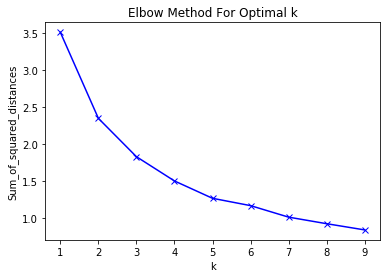

In [40]:
makati_grouped_new_clustering = makati_grouped_new
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k,random_state=0)
    km = km.fit(makati_grouped_new_clustering)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

## K = 5 gives the optimal clustering

In [42]:
kclusters = 5
kmeans_new = KMeans(n_clusters=kclusters,random_state=0)
kmeans_new = kmeans_new.fit(makati_grouped_new_clustering)

In [43]:
neighborhoods_venues_sorted_new = neighborhoods_venues_sorted
neighborhoods_venues_sorted_new.drop(columns=['Cluster Labels'],inplace=True)

In [44]:
# add clustering labels
neighborhoods_venues_sorted_new.insert(0, 'Cluster Labels', kmeans_new.labels_)

makati_merged_new = makati_data

makati_merged_new = makati_merged_new.join(neighborhoods_venues_sorted_new.set_index('Neighborhood'), on='Neighborhood')

### Cluster 1

In [45]:
makati_merged_new.loc[makati_merged_new['Cluster Labels'] == 0, makati_merged_new.columns[[2] + list(range(5, makati_merged_new.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Makati CPO (Inc, Buendia Up To",0,Bar,Pizza Place,Beer Garden,Hotel,Coffee Shop,Grocery Store,Karaoke Bar,Yoga Studio,Sporting Goods Shop,Food Court
2,San Antonio Village (Inc. Malu),0,Coffee Shop,Convenience Store,BBQ Joint,Donut Shop,Filipino Restaurant,Japanese Restaurant,Bar,Sandwich Place,Asian Restaurant,Pizza Place
4,Sta. Cruz,0,Beer Garden,Hotel,Dessert Shop,Karaoke Bar,Sandwich Place,Restaurant,Fast Food Restaurant,Bubble Tea Shop,Korean Restaurant,Szechuan Restaurant
6,Olympia And Carmona,0,Convenience Store,Filipino Restaurant,Fast Food Restaurant,Coffee Shop,Gym / Fitness Center,Café,American Restaurant,Clothing Store,Chinese Restaurant,Restaurant
9,Poblacion,0,Café,Coffee Shop,Korean Restaurant,Hostel,Dessert Shop,Bubble Tea Shop,Hotel,Women's Store,Shopping Mall,Spa
10,Guadalupe Viejo (Inc. Palm Vil),0,Restaurant,Coffee Shop,Dessert Shop,Fast Food Restaurant,Japanese Restaurant,Movie Theater,Frozen Yogurt Shop,Multiplex,Dumpling Restaurant,Boutique
16,Comembo,0,Fast Food Restaurant,Ramen Restaurant,Convenience Store,Diner,BBQ Joint,Bakery,Pharmacy,Chinese Restaurant,Fish Market,Juice Bar
17,Pembo,0,Coffee Shop,Convenience Store,Clothing Store,Movie Theater,Dessert Shop,Filipino Restaurant,Korean Restaurant,Frozen Yogurt Shop,Lounge,Buffet
18,Forbes Park North,0,Deli / Bodega,BBQ Joint,Snack Place,Fast Food Restaurant,Café,Bookstore,Golf Course,Coffee Shop,Drugstore,Japanese Restaurant
22,San Lorenzo Village,0,Shopping Mall,Clothing Store,Italian Restaurant,Boutique,Ice Cream Shop,Café,Hotel,Japanese Restaurant,Cosmetics Shop,Frozen Yogurt Shop


### Cluster 2

In [46]:
makati_merged_new.loc[makati_merged_new['Cluster Labels'] == 1, makati_merged_new.columns[[2] + list(range(5, makati_merged_new.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,La Paz-Singkamas-Tejeros,1,Filipino Restaurant,Restaurant,Convenience Store,Pet Store,Italian Restaurant,Burger Joint,Bubble Tea Shop,Fried Chicken Joint,Gas Station,Korean Restaurant
15,Rembo (East) & Malapad Na Bato,1,Coffee Shop,Café,Japanese Restaurant,Plaza,Latin American Restaurant,Pet Service,Comfort Food Restaurant,Drugstore,Seafood Restaurant,Middle Eastern Restaurant
19,Forbes Park South,1,Coffee Shop,Café,Italian Restaurant,Lounge,Japanese Restaurant,American Restaurant,Tailor Shop,Dessert Shop,Plaza,Field
21,Dasmarinas Village South,1,Basketball Court,Hotel,Baseball Field,Coffee Shop,Camera Store,Theater,Gym,Bus Line,Ice Cream Shop,Art Gallery
29,Pio Del Pilar,1,Japanese Restaurant,Spa,Convenience Store,Pizza Place,Music Venue,Fast Food Restaurant,Coffee Shop,Diner,Donut Shop,Bar
30,"Pasong Tamo 2000 Up, Ecology V",1,Coffee Shop,Gym,Fast Food Restaurant,Bubble Tea Shop,Filipino Restaurant,Convenience Store,Cocktail Bar,Fried Chicken Joint,Donut Shop,Grocery Store
33,San Isidro,1,Fast Food Restaurant,Filipino Restaurant,Chinese Restaurant,Bar,Cupcake Shop,Food Court,Mediterranean Restaurant,Music Venue,Bookstore,Donut Shop
34,Palanan,1,Fast Food Restaurant,Pharmacy,Filipino Restaurant,Pizza Place,Bakery,Cupcake Shop,Snack Place,Bubble Tea Shop,Food Court,Bookstore


### Cluster 3

In [47]:
makati_merged_new.loc[makati_merged_new['Cluster Labels'] == 2, makati_merged_new.columns[[2] + list(range(5, makati_merged_new.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Kasilawan,2,Convenience Store,Dim Sum Restaurant,Athletics & Sports,Fast Food Restaurant,BBQ Joint,Supermarket,Shop & Service,Bus Stop,Yoga Studio,Electronics Store
11,Guadalupe Nuevo (Inc. Visayan),2,Convenience Store,Fast Food Restaurant,Breakfast Spot,Bakery,Dim Sum Restaurant,Farmers Market,Music Store,Burger Joint,Motel,Basketball Court
13,Cembo,2,Convenience Store,Park,Pharmacy,Fast Food Restaurant,Yoga Studio,Drugstore,Filipino Restaurant,Field,Farmers Market,Falafel Restaurant
14,Rembo(west),2,Fast Food Restaurant,Moving Target,Convenience Store,Snack Place,Yoga Studio,Dumpling Restaurant,Filipino Restaurant,Field,Farmers Market,Falafel Restaurant


### Cluster 4

In [48]:
makati_merged_new.loc[makati_merged_new['Cluster Labels'] == 3, makati_merged_new.columns[[2] + list(range(5, makati_merged_new.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
31,Magallanes Village,3,Diner,Pizza Place,Coffee Shop,Bar,Food & Drink Shop,Mongolian Restaurant,Café,Mattress Store,Sports Bar,Steakhouse
32,Bangkal,3,Convenience Store,Bar,Pharmacy,Diner,Resort,Restaurant,Chinese Restaurant,Fast Food Restaurant,Burger Joint,French Restaurant


### Cluster 5

In [49]:
makati_merged_new.loc[makati_merged_new['Cluster Labels'] == 4, makati_merged_new.columns[[2] + list(range(5, makati_merged_new.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,Pinagkaisahan-pitogo,4,Food,Soccer Field,Intersection,Basketball Court,Eastern European Restaurant,Fish Market,Filipino Restaurant,Field,Fast Food Restaurant,Farmers Market


## Display the neighborhood clusters on a map of Makati.  Markers for the 10 subway stations are also shown.

In [51]:
# create map
map_clusters_new = folium.Map(location=[latitude, longitude], zoom_start=14)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
rainbow = ['blue','purple','red','orange','green']
# add markers to the map
for lat, lon, poi, cluster in zip(makati_merged_new['Latitude'], makati_merged_new['Longitude'], makati_merged_new['Neighborhood'], makati_merged_new['Cluster Labels']):
    label = folium.Popup(str(poi), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster],
        fill=True,
        fill_color=rainbow[cluster],
        fill_opacity=0.7).add_to(map_clusters_new)

for index, row in makati_stations.iterrows():
    folium.Marker(location=[makati_stations.loc[index,'Latitude'],makati_stations.loc[index,'Longitude']], popup = makati_stations.loc[index,'Station'], 
                  icon= folium.Icon(color='black', 
                  icon_color='white',icon = 'cloud')).add_to(map_clusters_new)
map_clusters_new.save('makati_clusters_new.html')  
map_clusters_new